In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import random as rn
import cv2
##Para conectar con el drive
from google.colab import drive
from google.colab.patches import cv2_imshow
from skimage import io,filters
drive.mount('/content/drive')
##Direción de la imagen
PATH = '/content/drive/Shareddrives/Los mejorcitos/Base de datos equilibrada x/BD 3 X (270)/Rust/'

Mounted at /content/drive


Carga imagen a color y grayscale

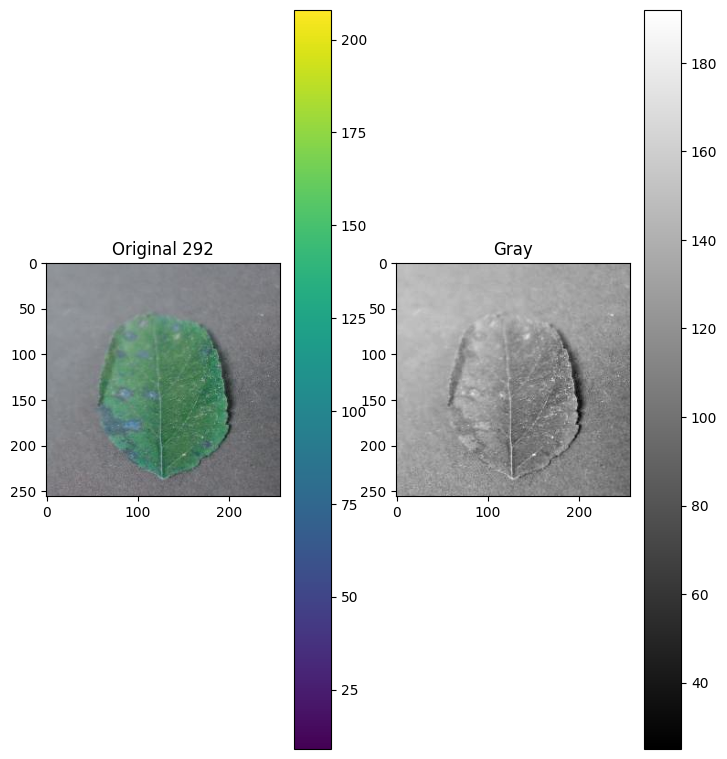

In [ ]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 


#visualizacion
plt.figure(figsize=(12.8,9.6))
plt.subplot(131)
plt.imshow(img)
plt.title('Original '+ name)
plt.colorbar()

plt.subplot(132)
plt.imshow(img_gray,"gray")
plt.title('Gray')
plt.colorbar()

plt.show()

# **Verde**

Text(0.5, 1.0, 'Color')

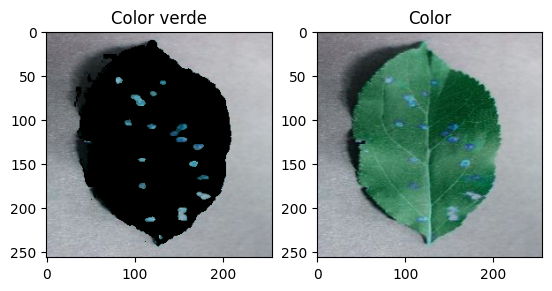

In [ ]:
name = str(rn.randint(270,320)) #imagen aleatoria
img = cv2.imread(PATH + name + ".jpg", cv2.IMREAD_COLOR)
#conversion escala de grises
img_gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY) 

# Convertir la imagen al espacio de color HSV
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

# Definir el rango de color de la hoja en HSV
lower_green = np.array([30, 30, 30])  # Ajusta los valores según tus necesidades
upper_green = np.array([70, 255, 255])  # Ajusta los valores según tus necesidades

# Aplicar la segmentación por umbralización en el espacio de color HSV
mask = cv2.inRange(hsv, lower_green, upper_green)

# Invertir la máscara para obtener el fondo en negro y la hoja en blanco
mask_inverse = cv2.bitwise_not(mask)

# Aplicar la máscara invertida a la imagen original
result = cv2.bitwise_and(img, img, mask=mask_inverse)

plt.subplot(121)
plt.imshow(result)
plt.title('Color verde')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Binarizando la imagen de Color verde

Text(0.5, 1.0, 'Color')

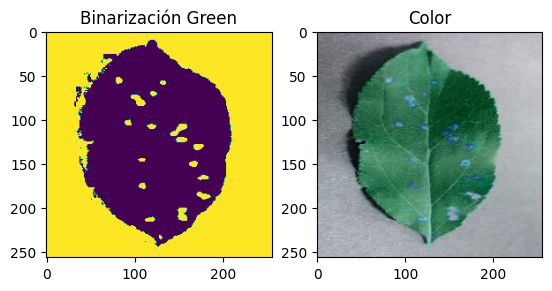

In [ ]:
green_segmentation =cv2.cvtColor(result,cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation_green = cv2.threshold(green_segmentation, threshold_value, 255, cv2.THRESH_BINARY)

# Mostrar la imagen binarizada
plt.subplot(121)
plt.imshow(binary_segmentation_green)
plt.title('Binarización Green')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

# **Gris**

Text(0.5, 1.0, 'Color')

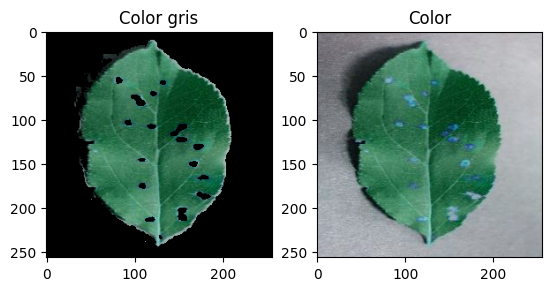

In [ ]:
# Definir el rango de color gris
lower_gray = 50  # Ajusta el valor según tus necesidades
upper_gray = 150  # Ajusta el valor según tus necesidades

# Aplicar la umbralización para segmentar el color gris
mask2 = cv2.inRange(img_gray, lower_gray, upper_gray)

# Aplicar la máscara a la imagen original
result2 = cv2.bitwise_and(img, img, mask=mask)

plt.subplot(121)
plt.imshow(result2)
plt.title('Color gris')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Text(0.5, 1.0, 'Color')

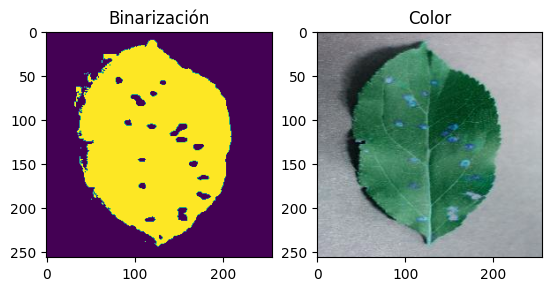

In [ ]:
gray_segmentation=cv2.cvtColor(result2,cv2.COLOR_BGR2GRAY)
# Aplicar una umbralización para obtener los píxeles que superan el umbral
threshold_value = 0  # Ajusta este valor según tus necesidades
_, binary_segmentation = cv2.threshold(gray_segmentation, threshold_value, 255, cv2.THRESH_BINARY)

# Mostrar la imagen binarizada
plt.subplot(121)
plt.imshow(binary_segmentation)
plt.title('Binarización')

plt.subplot(122)
plt.imshow(img)
plt.title('Color')

Aplicando dilatación y erosión para quitar los huecos de la imagen binarizada

Text(0.5, 1.0, '3_2')

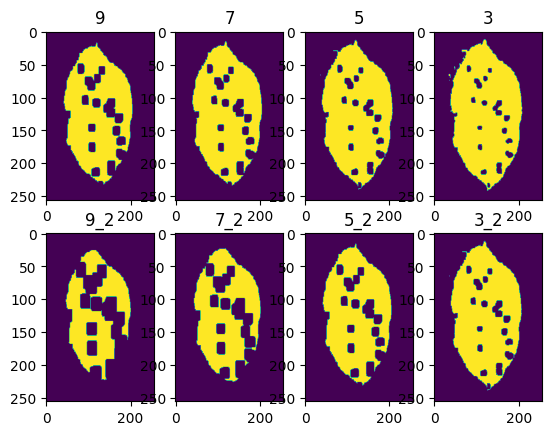

In [ ]:

# Definir el kernel para la operación de dilatación y erosión
kernel_9 = 9  # Ajusta este valor según tus necesidades
kernel_7 = 7
kernel_5 = 5 
kernel_3 = 3 
kernel_9 = np.ones((kernel_9, kernel_9), np.uint8)
kernel_7 = np.ones((kernel_7, kernel_7), np.uint8)
kernel_5 = np.ones((kernel_5, kernel_5), np.uint8)
kernel_3 = np.ones((kernel_3, kernel_3), np.uint8)

# Aplicar la operación de dilatación
dilated_segmentation_9 = cv2.dilate(binary_segmentation, kernel_9, iterations=1)
dilated_segmentation_7 = cv2.dilate(binary_segmentation, kernel_7, iterations=1)
dilated_segmentation_5 = cv2.dilate(binary_segmentation, kernel_5, iterations=1)
dilated_segmentation_3 = cv2.dilate(binary_segmentation, kernel_3, iterations=1)

# Dos iteraciones
dilated_segmentation_92 = cv2.dilate(binary_segmentation, kernel_9, iterations=2)
dilated_segmentation_72 = cv2.dilate(binary_segmentation, kernel_7, iterations=2)
dilated_segmentation_52 = cv2.dilate(binary_segmentation, kernel_5, iterations=2)
dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)

# Aplicar la operación de erosión
closed_segmentation_9 = cv2.erode(binary_segmentation, kernel_9, iterations=1)
closed_segmentation_7 = cv2.erode(binary_segmentation, kernel_7, iterations=1)
closed_segmentation_5 = cv2.erode(binary_segmentation, kernel_5, iterations=1)
closed_segmentation_3 = cv2.erode(binary_segmentation, kernel_3, iterations=1)

closed_segmentation_92 = cv2.erode(binary_segmentation, kernel_9, iterations=2)
closed_segmentation_72 = cv2.erode(binary_segmentation, kernel_7, iterations=2)
closed_segmentation_52 = cv2.erode(binary_segmentation, kernel_5, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)

# Mostrar la imagen binarizada
plt.subplot(241)
plt.imshow(closed_segmentation_9, aspect="auto")
plt.title('9')

plt.subplot(242)
plt.imshow(closed_segmentation_7, aspect="auto")
plt.title('7')

plt.subplot(243)
plt.imshow(closed_segmentation_5, aspect="auto")
plt.title('5')

plt.subplot(244)
plt.imshow(closed_segmentation_3, aspect="auto")
plt.title('3')

plt.subplot(245)
plt.imshow(closed_segmentation_92, aspect="auto")
plt.title('9_2')

plt.subplot(246)
plt.imshow(closed_segmentation_72, aspect="auto")
plt.title('7_2')

plt.subplot(247)
plt.imshow(closed_segmentation_52, aspect="auto")
plt.title('5_2')

plt.subplot(248)
plt.imshow(closed_segmentation_32, aspect="auto")
plt.title('3_2')



*   Detección de bordes Cany





In [ ]:

dilated_segmentation_32 = cv2.dilate(binary_segmentation, kernel_3, iterations=2)
closed_segmentation_32 = cv2.erode(binary_segmentation, kernel_3, iterations=2)

Text(0.5, 1.0, 'Contornos')

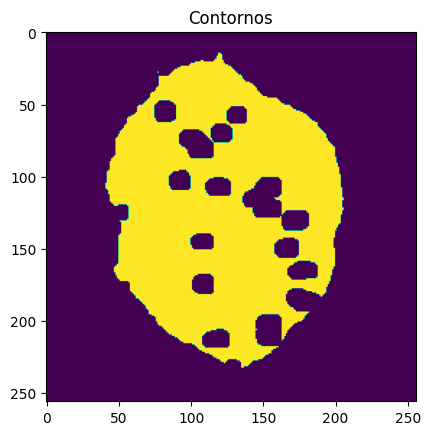

In [ ]:
# Aplicar el algoritmo de detección de bordes Canny
edges = cv2.Canny(closed_segmentation_32, 30, 70)  # Ajusta los valores de umbral según tus necesidades

# Dibujar los contornos encontrados en la imagen original
contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cv2.drawContours(closed_segmentation_32, contours, -1, (0, 255, 0), 2)

plt.subplot(111)
plt.imshow(closed_segmentation_32)
plt.title('Contornos')

Encontrar el contorno con mayor cantidad de pixeles

Text(0.5, 1.0, 'Contornos')

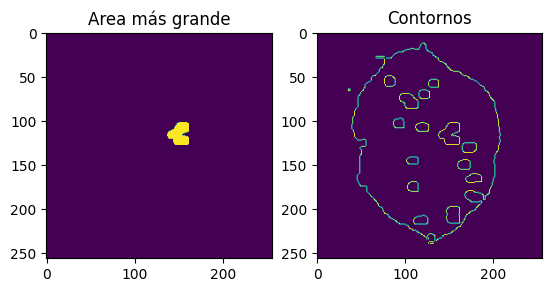

In [ ]:

# Inicializar la variable para almacenar el área máxima y el índice del contorno más grande
max_area = 0
max_contour_index = -1

# Calcular el área de cada contorno y encontrar el contorno más grande
for i, contour in enumerate(contours):
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour_index = i

# Crear una imagen binaria para la región más grande
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image, contours, max_contour_index, 255, -1)

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en la región más grande y 0 en el resto de regiones
final_image = np.where(binary_image == 255, 255, 0)

plt.subplot(121)
plt.imshow(final_image)
plt.title('Area más grande')

plt.subplot(122)
plt.imshow(edges)
plt.title('Contornos')


Prueba 2

Text(0.5, 1.0, 'Contornos')

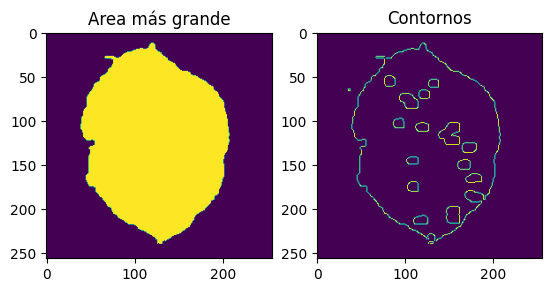

In [ ]:

# Aplicar una operación morfológica de cierre para cerrar los contornos
kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (5, 5))
closed_image = cv2.morphologyEx(edges, cv2.MORPH_CLOSE, kernel)

# Encontrar los contornos en la imagen cerrada
contours, _ = cv2.findContours(closed_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Calcular el área de cada contorno y encontrar el contorno más grande
max_area = 0
max_contour = None
for contour in contours:
    area = cv2.contourArea(contour)
    if area > max_area:
        max_area = area
        max_contour = contour

# Crear una imagen binaria donde los píxeles tomen el valor de 255 en el contorno más grande y 0 en el resto de regiones
binary_image = np.zeros_like(edges)
cv2.drawContours(binary_image_2, [max_contour], -1, 255, cv2.FILLED)

plt.subplot(121)
plt.imshow(binary_image_2)
plt.title('Area más grande')

plt.subplot(122)
plt.imshow(edges)
plt.title('Contornos')



Segmentando la hoja

Text(0.5, 1.0, 'Hoja segmentada')

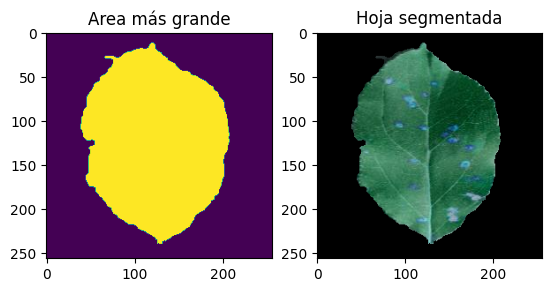

In [ ]:
#segmented_image = np.where(binary_image_2 == 255, img, 0)
#segmented_image = np.where(binary_image_2[:, :, np.newaxis] == 0, img, 0)

segmented_image = cv2.bitwise_and(img, img, mask=binary_image_2.astype(np.uint8))

#segmented_image = cv2.bitwise_and(img, img, mask=binary_image_2)

plt.subplot(121)
plt.imshow(binary_image_2)
plt.title('Area más grande')

plt.subplot(122)
plt.imshow(segmented_image)
plt.title('Hoja segmentada')


Segmentando parte enferma de la hoja

Text(0.5, 1.0, 'Zona enferma')

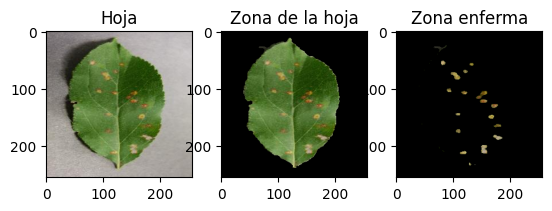

In [ ]:
# Convertir la imagen a espacio de color HSV
hsv_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2HSV)

# Definir el rango de colores verde en HSV
lower_green = np.array([30, 50, 50])
upper_green = np.array([90, 255, 255])

# Crear una máscara para los pixeles verdes
green_mask = cv2.inRange(hsv_image, lower_green, upper_green)

# Invertir la máscara para obtener las partes no verdes
non_green_mask = cv2.bitwise_not(green_mask)

# Aplicar la máscara a la imagen segmentada
non_green_segmented_image = cv2.bitwise_and(segmented_image, segmented_image, mask=non_green_mask)

# Mostrar la imagen segmentada de partes no verdes

plt.subplot(131)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)
plt.title('Hoja')

plt.subplot(132)
segmented_image = cv2.cvtColor(segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(segmented_image)
plt.title('Zona de la hoja')

plt.subplot(133)
non_green_segmented_image = cv2.cvtColor(non_green_segmented_image, cv2.COLOR_BGR2RGB)
plt.imshow(non_green_segmented_image)
plt.title('Zona enferma')

